## Import Package and authenrize

In [0]:
# run this for anthentic
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# for export csv files
from google.colab import files
# for data science
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
import collections
import warnings; warnings.filterwarnings(action='once')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/lib/python3.6/importlib/_bootstrap.

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
#for file1 in file_list:
#  print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))


/usr/local/lib/python3.6/dist-packages/google/colab/auth.py:160: ResourceWarning: unclosed <ssl.SSLSocket fd=57, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 58272), raddr=('74.125.71.95', 443)>
  if _check_adc():


## Get path


In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))

title: OPT, id: 18Fh_9fmOplkJnWJIFD284V0KsCO4hy5i, mimeType: application/vnd.google-apps.folder
title: Untitled Diagram.drawio, id: 15mmnC58F1X-NDM8WuXNWHZI4zijuU8AC, mimeType: application/vnd.jgraph.mxfile
title: 576_project, id: 1qr41jUEIRRyijdPFqSzuaSaRToNKvYZR, mimeType: application/vnd.google-apps.folder
title: INFO 576, id: 1PVuXVH8Sgv5lpeUBHz-wa_m4A9fD_jRV, mimeType: application/vnd.google-apps.folder
title: MA494, id: 1pfxzgJt-Cb3c4Rt8ry2sqpMoeC8d7GOh, mimeType: application/vnd.google-apps.folder
title: Templete1, id: 1OzbQK2lJKJ9PfLqWGZ4n1HrJybZywzQhrbzz3ck_4R4, mimeType: application/vnd.google-apps.presentation
title: Capstone, id: 1axxJz54LSJR581CjuX5Xib450RULEb4T, mimeType: application/vnd.google-apps.folder
title: Untitled.gantter, id: 1yC3tqyWPNfay6k6go-hdHM4YQesfmQPF, mimeType: application/vnd.google-apps.drive-sdk.549517827371
title: MATH1(1).ZIP, id: 1z2UaIuSIPgSt-fiRTmyeAJoNTVZ5z2KZ, mimeType: application/zip
title: MATH2(1).zip, id: 1T6XvdUgeKoaTiKkJkguJjKiHaYZFNo7G,

In [0]:
root_file = drive.ListFile({'q': "'1qr41jUEIRRyijdPFqSzuaSaRToNKvYZR' in parents"}).GetList()
for _file in root_file:
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))

title: 576_project_datacleaning_model.ipynb, id: 1Dp4j14iJPfIRJx-UYRtbGsDkY4VQsgIQ, mimeType: application/vnd.google.colaboratory
title: Problem_Statement_Blackground, id: 1GWqafd79D0_6-EtpCT53-sS3FpsVSZqRYELBSATeCWw, mimeType: application/vnd.google-apps.document
title: 576_project_eda.ipynb, id: 1DxTmQxjXrTE1jLcbP1bI02QBwGMYJ3Hb, mimeType: application/octet-stream
title: 576_project_datamerge.ipynb, id: 11dky1M7vjJyMKA8JQ6F41ctJ-oCM7oGB, mimeType: application/vnd.google.colaboratory
title: data-pei, id: 1SnFn8uYkEV-obdx37je4uGCf5oJnIWWM, mimeType: application/vnd.google-apps.folder
title: 无标题演示文稿, id: 1ZpfHRmVVtcsr6An9sqmZPK0JPK8zKWYw4xh2Em8d2as, mimeType: application/vnd.google-apps.presentation
title: problem_stat, id: 1C5iMFb1XH_ONNSJoKgKSXLKSayUaJDsvYG_fhNrwLvM, mimeType: application/vnd.google-apps.presentation
title: data, id: 19hm1WTdkVpXmmSWVWyOnLuUUOaMxDe85, mimeType: application/vnd.google-apps.folder


In [0]:
root_file = drive.ListFile({'q': "'19hm1WTdkVpXmmSWVWyOnLuUUOaMxDe85' in parents"}).GetList()
for _file in root_file:
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))

title: Merged_FlightsWeather.csv, id: 1fiMX5Ld65Npbi5_kmjvdEbCFiSEQ2Raw, mimeType: text/csv
title: merged_FlightsWeather.csv, id: 1-1BhsbhTKlqfb-jYmP6YwZBm6mXSb6UT, mimeType: text/csv
title: weather_flights_washU.csv, id: 1SEH3G8L2abRA5SMPou_cUshcINfEeZu1, mimeType: text/csv
title: all_year_flights.csv, id: 1KR6r_xyd-BBA7Kp2d3h1bBx43AMSYnWq, mimeType: text/csv
title: all_year_flights.csv, id: 1tkNhdTZoY9PB0bAGYdpFom7q3vdiSxpE, mimeType: text/csv
title: weather_data_2014_wash_U.csv, id: 1wrO_KanAmA3Cv1rAON0Or0e7P9AJIqzA, mimeType: text/csv
title: 15flights.csv, id: 1SP8v0tkOFb8IBtDkrEW9h8vh2nzGyR1B, mimeType: text/csv
title: 14flights.csv, id: 1YtYnISGNj9XY_niimdFcJm3b-0HXnrm-, mimeType: text/csv
title: 13flights.csv, id: 15z2Ri2r9NYtZhgvzxbWn_70ZD_ydEsQW, mimeType: text/csv
title: 12flights.csv, id: 14HoS5BZ79p01HGashkZFTiKOLm_60yMP, mimeType: text/csv
title: 11flights.csv, id: 1p9LTHg6NQobOB9p7PHg6ZSntGzrjSRFd, mimeType: text/csv
title: 10flights.csv, id: 10gdVOVKECa-MXAK1aXnwlvB2iyXR

## Load dataframe

In [0]:
downloaded2 = drive.CreateFile({'id':'1fiMX5Ld65Npbi5_kmjvdEbCFiSEQ2Raw'}) 
downloaded2.GetContentFile('Merged_FlightsWeather.csv')  
df_origin = pd.read_csv('Merged_FlightsWeather.csv')

In [0]:
df_origin.shape

(273579, 38)

In [0]:
df_origin

,scheduled_dep,year,month,day,dayofweek,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,cancelled,distance,air_time,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,hour,minute,departure_time,delay,Unnamed: 0,IATA,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2014-01-01 05:00:00,2014,1,1,3,454.0,-6.0,754.0,7.0,US,N544UW,452,ORD,PHX,0,1440,204.0,NaN,NaN,NaN,NaN,NaN,4.0,54.0,2014-01-01 04:54:00,-1 days +23:54:00.000000000,165504,ORD,10.04,3.92,75.77,10.0,10.35702,11.918651,0.05,1026.5,1.75,2014-01-01 05:00:00
1,2014-01-01 05:09:00,2014,1,1,3,516.0,7.0,756.0,-3.0,UA,N73256,1500,ORD,IAH,0,925,146.0,NaN,NaN,NaN,NaN,NaN,5.0,16.0,2014-01-01 05:16:00,0 days 00:07:00.000000000,165504,ORD,10.04,3.92,75.77,10.0,10.35702,11.918651,0.05,1026.5,1.75,2014-01-01 05:00:00
2,2014-01-01 05:35:00,2014,1,1,3,532.0,-3.0,808.0,-12.0,UA,N36444,1199,ORD,IAD,0,589,75.0,NaN,NaN,NaN,NaN,NaN,5.0,32.0,2014-01-01 05:32:00,-1 days +23:57:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
3,2014-01-01 05:45:00,2014,1,1,3,612.0,27.0,818.0,15.0,UA,N24729,1681,ORD,CLE,0,315,47.0,0.0,15.0,0.0,0.0,0.0,6.0,12.0,2014-01-01 06:12:00,0 days 00:27:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
4,2014-01-01 05:50:00,2014,1,1,3,643.0,53.0,945.0,50.0,AA,N3KDAA,398,ORD,LGA,0,733,88.0,38.0,12.0,0.0,0.0,0.0,6.0,43.0,2014-01-01 06:43:00,0 days 00:53:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273574,2014-12-31 22:15:00,2014,12,31,3,2250.0,35.0,47.0,29.0,MQ,N648MQ,2910,ORD,DTW,0,235,42.0,29.0,0.0,0.0,0.0,0.0,22.0,50.0,2014-12-31 22:50:00,0 days 00:35:00.000000000,174202,ORD,15.08,-2.92,44.04,300.0,9.20624,10.594357,0.00,1037.8,10.00,2014-12-30 23:00:00
273575,2014-12-31 22:15:00,2014,12,31,3,2303.0,48.0,10.0,47.0,MQ,N633MQ,3405,ORD,DSM,0,299,53.0,45.0,0.0,0.0,0.0,2.0,23.0,3.0,2014-12-31 23:03:00,0 days 00:48:00.000000000,174202,ORD,15.08,-2.92,44.04,300.0,9.20624,10.594357,0.00,1037.8,10.00,2014-12-30 23:00:00
273576,2014-12-31 22:20:00,2014,12,31,3,2257.0,37.0,33.0,30.0,MQ,N511MQ,3174,ORD,LIT,0,552,77.0,30.0,0.0,0.0,0.0,0.0,22.0,57.0,2014-12-31 22:57:00,0 days 00:37:00.000000000,174202,ORD,15.08,-2.92,44.04,300.0,9.20624,10.594357,0.00,1037.8,10.00,2014-12-30 23:00:00
273577,2014-12-31 22:20:00,2014,12,31,3,2308.0,48.0,101.0,38.0,MQ,N850MQ,3642,ORD,DAY,0,240,37.0,38.0,0.0,0.0,0.0,0.0,23.0,8.0,2014-12-31 23:08:00,0 days 00:48:00.000000000,174202,ORD,15.08,-2.92,44.04,300.0,9.20624,10.594357,0.00,1037.8,10.00,2014-12-30 23:00:00


## Data cleaning

In [0]:
#df_origin.columns

In [0]:
#df_origin.dtypes

In [0]:
print(df_origin.isnull().sum())

scheduled_dep             0
year                      0
month                     0
day                       0
dayofweek                 0
dep_time                  0
dep_delay                 0
arr_time                238
arr_delay               739
carrier                   0
tailnum                   0
flight                    0
origin                    0
dest                      0
cancelled                 0
distance                  0
air_time                739
carrierdelay         188288
weatherdelay         188288
nasdelay             188288
securitydelay        188288
lateaircraftdelay    188288
hour                      0
minute                    0
departure_time            0
delay                     0
Unnamed: 0                0
IATA                      0
temp                    192
dewp                    192
humid                   192
wind_dir               4452
wind_speed              357
wind_gust               357
precip                    0
pressure            

In [0]:
df_model = df_origin[['temp', 'humid', 'wind_dir', 'wind_speed', 'precip', 'pressure', 'visib', 'weatherdelay']]

clean the dataframe throwing the variables we won't use and re-organize the columns to ease its reading

In [0]:
print(df_model.isnull().sum())

temp               192
humid              192
wind_dir          4452
wind_speed         357
precip               0
pressure         43637
visib              192
weatherdelay    188288
dtype: int64


In [0]:
df_model = df_model.fillna(value = {'weatherdelay': 0})

NA in 'weatherdelay' column are considered no weather related departure delay. Therefore, fill it with 0

In [0]:
df_model['pressure'] = df_model['pressure'].fillna(df_origin['pressure'].mode()[0])

Since we have significant volume of NA pressure, I decided to fill NA with its mode

In [0]:
print(df_model.isnull().sum())

temp             192
humid            192
wind_dir        4452
wind_speed       357
precip             0
pressure           0
visib            192
weatherdelay       0
dtype: int64


In [0]:
df_model = df_model.dropna(subset=['temp', 'wind_dir', 'wind_speed'])

In [0]:
print(df_model.isnull().sum())

temp            0
humid           0
wind_dir        0
wind_speed      0
precip          0
pressure        0
visib           0
weatherdelay    0
dtype: int64


In [0]:
df_model = df_model.reset_index().drop(['index'], axis=1)

In [0]:
df_model.shape

(269127, 8)

In [0]:
df_model.head(5)

,temp,humid,wind_dir,wind_speed,precip,pressure,visib,weatherdelay
0,10.04,75.77,10.0,10.35702,0.05,1026.5,1.75,0.0
1,10.04,75.77,10.0,10.35702,0.05,1026.5,1.75,0.0
2,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,0.0
3,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,15.0
4,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,12.0


## Model fitting

### Target variable classification rule

In [0]:
len(df_model.weatherdelay[df_model.weatherdelay == 0])

260840

In [0]:
len(df_model.weatherdelay[df_model.weatherdelay > 0]) - len(df_model.weatherdelay[df_model.weatherdelay >= 30])

5382

In [0]:
len(df_model.weatherdelay[df_model.weatherdelay >= 30])

2905

Therefore, we classify our data to 3 level:

*   0 -- no delay (contains 260,840 obs.)
*   1 -- mild delay (contains 5,382 obs.)
*   2 -- severe delay (contains 2,905 obs.)



In [0]:
# df_model.precip.value_counts()

In [0]:
df_model

,temp,humid,wind_dir,wind_speed,precip,pressure,visib,weatherdelay
0,10.04,75.77,10.0,10.35702,0.05,1026.5,1.75,0.0
1,10.04,75.77,10.0,10.35702,0.05,1026.5,1.75,0.0
2,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,0.0
3,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,15.0
4,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,12.0
...,...,...,...,...,...,...,...,...
273574,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0
273575,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0
273576,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0
273577,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0


### Creating target varaibles for layer1 and layer2

In [0]:
df_model['target1'] = np.where(df_model.weatherdelay > 0, 1, 0)

In [0]:
def convert_to_target (delay):
  for i in range(len(delay)):
    if delay[i] > 0 and delay[i] <= 30:
      delay[i] = 1
    if delay[i] > 30:
      delay[i] = 2

  return delay

In [0]:
df_model['target2'] = df_model['weatherdelay']
df_model['target2'] = convert_to_target (df_model['target2'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
df_model

,temp,humid,wind_dir,wind_speed,precip,pressure,visib,weatherdelay,target1,target2
0,10.04,75.77,10.0,10.35702,0.05,1026.5,1.75,0.0,0,0.0
1,10.04,75.77,10.0,10.35702,0.05,1026.5,1.75,0.0,0,0.0
2,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,0.0,0,0.0
3,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,15.0,1,1.0
4,10.40,72.12,10.0,10.35702,0.00,1016.7,7.00,12.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
269122,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0,0,0.0
269123,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0,0,0.0
269124,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0,0,0.0
269125,15.08,44.04,300.0,9.20624,0.00,1037.8,10.00,0.0,0,0.0


In [0]:
#collections.Counter(df_model.target2)[2]/len(df_model.target2)

0.010389147131280028

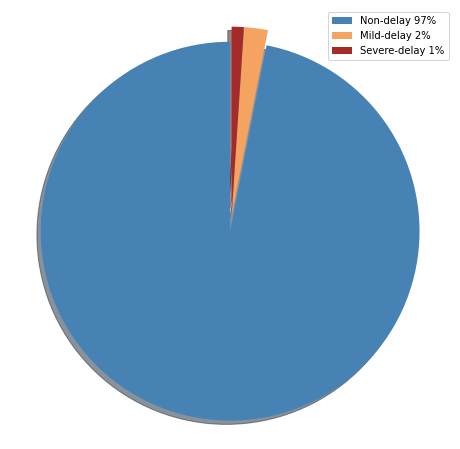

In [0]:
labels = 'Non-delay 97%', 'Mild-delay 2%', 'Severe-delay 1%'
sizes = [collections.Counter(df_model.target2)[0], collections.Counter(df_model.target2)[1], collections.Counter(df_model.target2)[2]]
explode = (0.08, 0, 0)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, 
        shadow=True, startangle=90, colors=['steelblue','sandybrown','brown'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels)
plt.show()

In [0]:
X = df_model[["temp",	"humid", "wind_dir", "wind_speed", "precip", "pressure", "visib", "weatherdelay","target2"]]

In [0]:
y = df_model["target1"]

In [0]:
collections.Counter(df_model['target1'])

Counter({0: 260840, 1: 8287})

### Splitting dataset into training and testing dataset

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.15, random_state = 0)

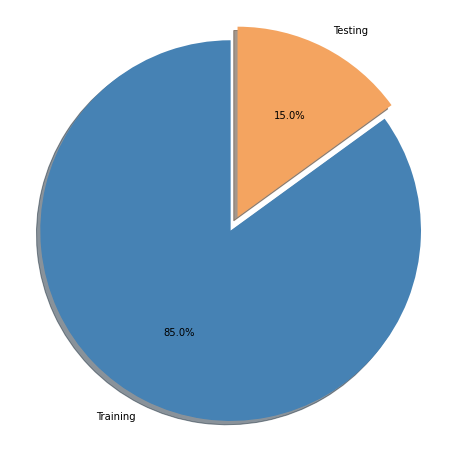

In [0]:
labels = 'Training', 'Testing'
sizes = [85, 15]
explode = (0, 0.08)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['steelblue','sandybrown'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Resampling

In [0]:
rus = RandomUnderSampler(random_state=0, sampling_strategy=0.5)
rus.fit(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
collections.Counter(y_resampled)

Counter({0: 14054, 1: 7027})

In this step, I implemented RandomUnderSampler function in imblearn package to under-sample the majority class (non-delay) by randomly picking samples without replacement following the 1:2 portion. That is the ratio of delay to non-delay is 1:2.

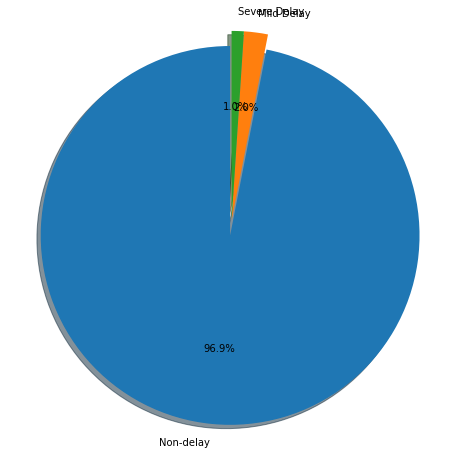

In [0]:
labels = 'Non-delay', 'Mild Delay', 'Severe Delay'
sizes = [collections.Counter(df_model.target2)[0], collections.Counter(df_model.target2)[1], collections.Counter(df_model.target2)[2]]
explode = (0.08, 0, 0)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [0]:
collections.Counter(df_model.target2)

Counter({0.0: 260840, 1.0: 5491, 2.0: 2796})

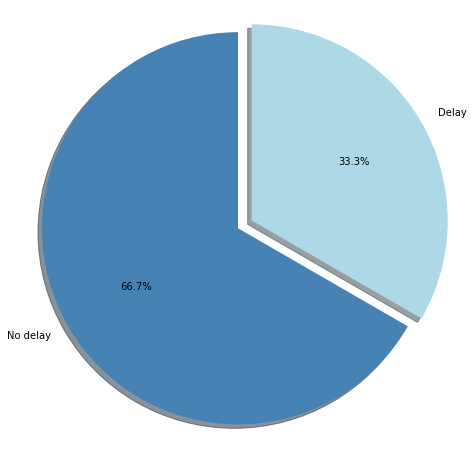

In [0]:
labels = 'No delay', 'Delay'
sizes = [collections.Counter(y_resampled)[0], collections.Counter(y_resampled)[1]]
explode = (0.08, 0)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['steelblue','lightblue'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

It's easier to understand by looking at this pie chart. After under-sampling majority class. We have 1/3 delay and 2/3 non-delay in the training dataset.

In [0]:
y_w = X_resampled[:,-2]  # only select column 'weatherdelay'

In [0]:
y_w_test = X_test.to_numpy()[:,-2] # only select column 'weatherdelay'

Here I use 'y_w' and 'y_w_test' to store the resampled weatherdelay data

In [0]:
y_t_test = X_test.to_numpy()[:,-1] # only select last column 'target2'

In [0]:
X_resampled = X_resampled[:,:-2]  # exclude the last two column

In [0]:
X_test = X_test.to_numpy()[:,:-2]  # exclude the last two column

In [0]:
y_test = y_test.to_numpy()

#### Model 1: logistic regression model

In [0]:
clf_logi = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)
logi_pred_train = clf_logi.predict(X_resampled)

/usr/local/lib/python3.6/dist-packages/matplotlib/artist.py:96: ResourceWarning: unclosed <ssl.SSLSocket fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 59970), raddr=('108.177.111.95', 443)>
  self._propobservers = {}  # a dict from oids to funcs


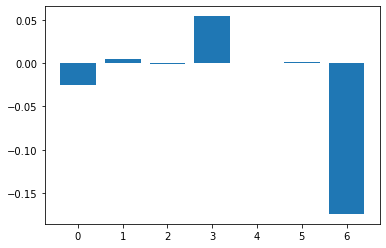

In [0]:
# plot feature importance
plt.bar([x for x in range(len(clf_logi.coef_[0]))], clf_logi.coef_[0])
plt.show()

In [0]:
pd.DataFrame(data = clf_logi.coef_[0], index = [['temp', 'humid', 'wind_dir', 'wind_speed', 'precip', 'pressure', 'visib']], columns = [["score"]])

,score
temp,-0.024919
humid,0.004868
wind_dir,-0.000734
wind_speed,0.054141
precip,0.000251
pressure,0.001011
visib,-0.174140


The three most important features for logistic regression model are temp, dewp, visib

In [0]:
print ("\nModel Report")
print ("AUC score : %.4g" % metrics.roc_auc_score(y_resampled, clf_logi.predict_proba(X_resampled)[:,1]))
print(classification_report(y_resampled, logi_pred_train))


Model Report
AUC score : 0.7344
              precision    recall  f1-score   support

           0       0.76      0.91      0.83     14054
           1       0.70      0.41      0.52      7027

    accuracy                           0.74     21081
   macro avg       0.73      0.66      0.67     21081
weighted avg       0.74      0.74      0.72     21081



#### Model 2: random forest

In [0]:
clf_rf_ori = RandomForestClassifier(random_state=0)
clf_rf_ori.fit(X_resampled, y_resampled)

rf_pred_train_ori = clf_rf_ori.predict(X_resampled)

print ("\nModel Report")
print ("AUC score : %.4g" % metrics.roc_auc_score(y_resampled, clf_rf_ori.predict_proba(X_resampled)[:,1]))
print(classification_report(y_resampled, rf_pred_train_ori))


Model Report
AUC score : 0.9695
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14054
           1       0.85      0.87      0.86      7027

    accuracy                           0.90     21081
   macro avg       0.89      0.89      0.89     21081
weighted avg       0.90      0.90      0.90     21081



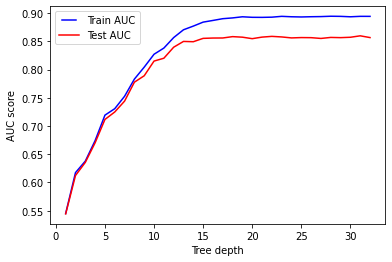

In [0]:
# using AUC(Area Under Curve) line to determine max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_resampled, y_resampled)
   train_pred = rf.predict(X_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

Code retrieved from https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

According to the plot, A curve to the top and left is a better model. So, the optimal max-depth is at 14

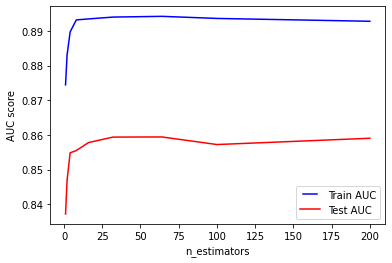

In [0]:
# using AUC(Area Under Curve) line to determine how many trees to be used
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_resampled, y_resampled)
   train_pred = rf.predict(X_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Code retrieved from https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

We can see that for our data, we can stop at 26 trees as increasing the number of trees decreases the test performance.

In [0]:
clf_rf = RandomForestClassifier(max_depth=14, n_estimators=26, random_state=0)
clf_rf.fit(X_resampled, y_resampled)

rf_pred_train = clf_rf.predict(X_resampled)

print ("\nModel Report")
print ("AUC score : %.4g" % metrics.roc_auc_score(y_resampled, clf_rf.predict_proba(X_resampled)[:,1]))
print(classification_report(y_resampled, rf_pred_train))


Model Report
AUC score : 0.9594
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14054
           1       0.86      0.82      0.84      7027

    accuracy                           0.89     21081
   macro avg       0.88      0.88      0.88     21081
weighted avg       0.89      0.89      0.89     21081



In [0]:
pd.DataFrame(data = clf_rf_ori.feature_importances_, index = [['temp', 'humid', 'wind_dir', 'wind_speed', 'precip', 'pressure', 'visib']], columns = [["score"]])

,score
temp,0.333737
humid,0.172786
wind_dir,0.117450
wind_speed,0.105831
precip,0.023821
pressure,0.153483
visib,0.092891


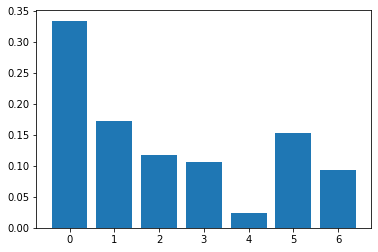

In [0]:
# plot feature importance
plt.bar([x for x in range(len(clf_rf_ori.feature_importances_))], clf_rf_ori.feature_importances_)
plt.show()

The two most important features are temp and dewp

#### Model 3: xgboost model

In [0]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
        
    #Print model report:
    print ("\nModel Report")
    print ("AUC score : %.4g" %  metrics.roc_auc_score(dtrain[target].values, alg.predict_proba(dtrain[predictors])[:,1]))
    print(classification_report(dtrain[target].values, dtrain_predictions))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

Before proceeding further, lets define a function which will help us create XGBoost models and perform cross-validation. The best part is that you can take this function as it is and use it later for your own models.

In [0]:
train = pd.DataFrame(X_resampled, columns=["temp",	"humid", "wind_dir", "wind_speed", "precip", "pressure", "visib"])

In [0]:
train['target1'] = pd.DataFrame(y_resampled, columns=['target1'])

In [0]:
train

,temp,humid,wind_dir,wind_speed,precip,pressure,visib,target1
0,64.04,64.84,30.0,8.05546,0.0,1020.0,10.0,0
1,80.06,35.03,80.0,10.35702,0.0,1010.9,10.0,0
2,57.02,52.70,30.0,12.65858,0.0,1021.2,10.0,0
3,42.08,82.17,360.0,20.71404,0.0,1016.7,8.0,0
4,28.94,71.91,260.0,12.65858,0.0,1024.8,7.0,0
...,...,...,...,...,...,...,...,...
21076,21.92,88.47,0.0,0.00000,0.0,1020.8,7.0,1
21077,28.04,60.10,280.0,24.16638,0.0,1010.3,7.0,1
21078,17.60,62.02,260.0,14.96014,0.0,1016.7,6.0,1
21079,66.02,83.79,170.0,13.80936,0.0,1016.7,10.0,1


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)



Model Report
AUC score : 0.8789
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     14054
           1       0.76      0.63      0.69      7027

    accuracy                           0.81     21081
   macro avg       0.80      0.77      0.78     21081
weighted avg       0.81      0.81      0.81     21081



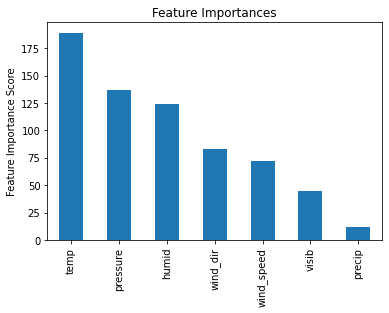

In [0]:
#Choose all predictors except target & IDcols
target = 'target1'
predictors = [x for x in train.columns if x not in [target]]

xgb_model_ori = XGBClassifier(seed=0)

modelfit(xgb_model_ori, train, predictors)

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)



Model Report
AUC score : 0.9536
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     14054
           1       0.85      0.82      0.84      7027

    accuracy                           0.89     21081
   macro avg       0.88      0.88      0.88     21081
weighted avg       0.89      0.89      0.89     21081



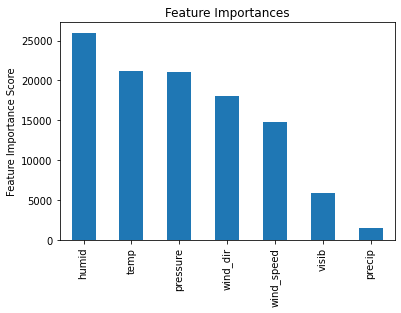

/usr/local/lib/python3.6/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=84, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 56042), raddr=('172.217.214.95', 443)>
  gc.collect(1)


In [0]:
#Choose all predictors except target & IDcols
target = 'target1'
predictors = [x for x in train.columns if x not in [target]]
xgb_model_tuned = XGBClassifier(scale_pos_weight = 1,
                      learning_rate = 0.01,  
                      min_child_weight = 4,
                      colsample_bytree = 0.85,
                      subsample = 0.9,
                      objective='binary:logistic',
                      reg_alpha = 1,
                      nthread = 4, 
                      n_estimators = 1000,
                      max_depth = 9,
                      gamma = 0,
                      seed = 0)

modelfit(xgb_model_tuned, train, predictors)

By comparing F-1 score and AUC score before and after fine tuning, there is an significant improvement.

#### Fine tuning XGBoost parameters (DON'T RUN THIS PART)

In [0]:
# Step 2: Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=0), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


({'mean_fit_time': array([27.33010163, 26.66709876, 26.58596888, 47.51351089, 47.72125058,
         47.08447838, 71.40235167, 69.81569309, 68.7345171 , 95.71989546,
         91.28790174, 70.28144789]),
  'mean_score_time': array([0.03904066, 0.03799815, 0.04101424, 0.05051346, 0.05324998,
         0.05155768, 0.074896  , 0.07780981, 0.07324052, 0.10363965,
         0.09990468, 0.06617489]),
  'mean_test_score': array([0.87838366, 0.87781261, 0.87824545, 0.90931687, 0.90872014,
         0.9082735 , 0.91995866, 0.91948067, 0.91950468, 0.92149243,
         0.92189794, 0.9214885 ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, Fa

In [0]:
param_test2 = {
 'max_depth':[8,9,10,11,12],
 'min_child_weight':[1,2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


({'mean_fit_time': array([109.6971818 , 105.90852318, 104.93895593, 103.36695905,
         124.32552257, 121.63828807, 119.61757789, 115.00018497,
         138.57485352, 136.12042146, 133.96549983, 131.91955104,
         155.44650588, 150.93893971, 147.4420435 , 143.58032699]),
  'mean_score_time': array([0.11016207, 0.09862547, 0.10627532, 0.10617394, 0.12816253,
         0.11373019, 0.11276507, 0.11222429, 0.14113107, 0.13139987,
         0.13830194, 0.12836204, 0.15486655, 0.14775133, 0.14916105,
         0.09661946]),
  'mean_test_score': array([0.92213347, 0.92278803, 0.9232945 , 0.92331192, 0.92133591,
         0.92233223, 0.92323812, 0.92322289, 0.9208323 , 0.92124564,
         0.92242604, 0.92299252, 0.91968132, 0.92108627, 0.92201839,
         0.92271448]),
  'param_max_depth': masked_array(data=[9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
                     12],
               mask=[False, False, False, False, False, False, False, False,
                     Fal

In [0]:
# Step 3: Tune gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


({'mean_fit_time': array([102.26590281, 101.65346007, 101.24410148,  99.95502033,
          79.93992066]),
  'mean_score_time': array([0.10702443, 0.10339327, 0.10324359, 0.09944849, 0.0756712 ]),
  'mean_test_score': array([0.92353635, 0.92335065, 0.92325542, 0.92313024, 0.92349183]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([1, 3, 4, 5, 2], dtype=int32),
  'split0_test_score': array([0.91847174, 0.91832428, 0.91788621, 0.91774204, 0.91900416]),
  'split1_test_score': array([0.92427837, 0.9249977 , 0.92478473, 0.92424764, 0.92429051]),
  'split2_test_score': array([0.92786453, 0.92715101, 0.92746566, 0.92708475, 0.9277158 ]),
  'split3_test_score': array([0.92510519, 0.92397232, 0.92474856, 0.9245055 , 0.92440433]),
  'split

In [0]:
# Step 4: Tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


({'mean_fit_time': array([116.15550542, 116.290556  , 116.55976186, 114.90039787,
         121.99928946, 120.47427268, 120.42410488, 119.26377363,
         126.16252518, 126.56764359, 125.85095038, 124.7306623 ,
         130.69025249, 131.23352199, 129.90379238, 123.92392774]),
  'mean_score_time': array([0.12326951, 0.11975546, 0.12396188, 0.12161336, 0.12819433,
         0.12206507, 0.12464242, 0.12021856, 0.12373228, 0.12970738,
         0.119629  , 0.12482371, 0.13584394, 0.11841865, 0.11369944,
         0.08382044]),
  'mean_test_score': array([0.92225779, 0.92224861, 0.92250538, 0.92309547, 0.92245882,
         0.92284024, 0.92257651, 0.92303911, 0.92244005, 0.92268678,
         0.92276823, 0.92295059, 0.92201763, 0.92269288, 0.9229541 ,
         0.92334076]),
  'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8,
                     0.8, 0.9, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, Fals

In [0]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(85,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=4,
                                     missing=None, n_estimators=177, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=0, silent=None,
                                     subsample=0.9, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.85, 0.9, 0.95],
                         'subsample': [0.85, 0.9, 0.95]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [0]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([12.27580676, 11.96703801, 11.66029925, 13.2979393 , 12.81089339,
         12.61694398, 13.16269317, 12.97289562, 10.57739701]),
  'mean_score_time': array([0.23686304, 0.20739422, 0.22524629, 0.24623351, 0.231181  ,
         0.24039321, 0.23010364, 0.19792004, 0.16916389]),
  'mean_test_score': array([0.92257642, 0.92317969, 0.92313887, 0.92275142, 0.92302508,
         0.92313118, 0.92275142, 0.92302508, 0.92313118]),
  'param_colsample_bytree': masked_array(data=[0.85, 0.85, 0.85, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.85, '

In [0]:
# Step 5: Tuning Regularization Parameters
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.85,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


({'mean_fit_time': array([12.00789351, 12.02142124, 11.96845841, 12.50370269,  4.75850234]),
  'mean_score_time': array([0.2311914 , 0.20385766, 0.21776505, 0.23945584, 0.05116849]),
  'mean_test_score': array([0.92317969, 0.92279972, 0.92294153, 0.92328127, 0.85758769]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'rank_test_score': array([2, 4, 3, 1, 5], dtype=int32),
  'split0_test_score': array([0.92530779, 0.92463172, 0.92560635, 0.92499657, 0.86832592]),
  'split1_test_score': array([0.92095061, 0.92076679, 0.92049169, 0.92066247, 0.85175739]),
  'split2_test_score': array([0.92239246, 0.9214941 , 0.92096618, 0.92215977, 0.85238735]),
  'split3_test_score': array([0.9250013 , 0.92535097, 0.92560214, 0.92529387, 0.85879748

In [0]:
param_test7 = {
 'reg_alpha':[0.5,1,1.5,2,10,20]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=9,
 min_child_weight=4, gamma=0, subsample=0.9, colsample_bytree=0.85,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


({'mean_fit_time': array([11.97426052, 11.95458012, 12.11114421, 12.54562788,  4.69420681]),
  'mean_score_time': array([0.21589422, 0.21494646, 0.19142551, 0.24150543, 0.044242  ]),
  'mean_test_score': array([0.92317969, 0.92279972, 0.92294153, 0.92328127, 0.85758769]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'rank_test_score': array([2, 4, 3, 1, 5], dtype=int32),
  'split0_test_score': array([0.92530779, 0.92463172, 0.92560635, 0.92499657, 0.86832592]),
  'split1_test_score': array([0.92095061, 0.92076679, 0.92049169, 0.92066247, 0.85175739]),
  'split2_test_score': array([0.92239246, 0.9214941 , 0.92096618, 0.92215977, 0.85238735]),
  'split3_test_score': array([0.9250013 , 0.92535097, 0.92560214, 0.92529387, 0.85879748

#### Validation of layer 1

In [0]:
# Logistic
logi_pred_test = clf_logi.predict(X_test)
print ("\nModel Validation Report")
print ("AUC score : %.4g" % metrics.roc_auc_score(y_test, clf_logi.predict_proba(X_test)[:,1]))
print(classification_report(y_test, logi_pred_test))


Model Validation Report
AUC score : 0.7181
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     39110
           1       0.13      0.41      0.20      1260

    accuracy                           0.90     40370
   macro avg       0.56      0.66      0.57     40370
weighted avg       0.95      0.90      0.92     40370



In [0]:
# Random Forest
rf_pred_test = clf_rf_ori.predict(X_test)
print ("\nModel Validation Report")
print ("AUC score : %.4g" % metrics.roc_auc_score(y_test, clf_rf_ori.predict_proba(X_test)[:,1]))
print(classification_report(y_test, rf_pred_test))


Model Validation Report
AUC score : 0.9135
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     39110
           1       0.20      0.83      0.32      1260

    accuracy                           0.89     40370
   macro avg       0.60      0.86      0.63     40370
weighted avg       0.97      0.89      0.92     40370



In [0]:
# XGBoost
xgb_model_ori.fit(X_resampled, y_resampled)
xgb_pred_test_ori = xgb_model_ori.predict(X_test)

print ("\nModel Validation Report")
print ("AUC score  : %.4g" % metrics.roc_auc_score(y_test, xgb_model_ori.predict_proba(X_test)[:,1]))
print(classification_report(y_test, xgb_pred_test_ori))

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)



Model Validation Report
AUC score  : 0.8678
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     39110
           1       0.16      0.63      0.26      1260

    accuracy                           0.89     40370
   macro avg       0.58      0.76      0.60     40370
weighted avg       0.96      0.89      0.92     40370



In [0]:
# XGBoost tuned
xgb_model_tuned.fit(X_resampled, y_resampled)
xgb_pred_test = xgb_model_tuned.predict(X_test)

print ("\nModel Validation Report")
print ("AUC score  : %.4g" % metrics.roc_auc_score(y_test, xgb_model_tuned.predict_proba(X_test)[:,1]))
print(classification_report(y_test, xgb_pred_test))

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)



Model Validation Report
AUC score  : 0.9214
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     39110
           1       0.22      0.80      0.35      1260

    accuracy                           0.91     40370
   macro avg       0.61      0.85      0.65     40370
weighted avg       0.97      0.91      0.93     40370



In [0]:
#test = pd.DataFrame(data = X_test, columns = ["temp", "dewp",	"humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"])

In [0]:
#test['target1'] = pd.DataFrame(y_test, columns=['target1'])

In [0]:
#test

,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,target1
0,78.98,62.06,56.18,70.0,8.05546,9.270062,0.0,1011.2,10.0,0
1,17.06,-2.92,40.41,260.0,13.80936,15.891535,0.0,1022.4,10.0,0
2,44.96,42.08,89.56,170.0,10.35702,11.918651,0.0,1008.4,5.0,0
3,24.98,17.96,74.29,280.0,13.80936,15.891535,0.0,1023.8,10.0,1
4,41.00,26.96,57.06,280.0,16.11092,18.540125,0.0,1006.5,10.0,0
...,...,...,...,...,...,...,...,...,...,...
40365,33.08,24.08,69.17,180.0,11.50780,13.242946,0.0,1012.2,10.0,0
40366,19.04,6.98,58.78,310.0,6.90468,7.945768,0.0,1007.2,10.0,0
40367,73.04,66.02,78.65,0.0,0.00000,0.000000,0.0,1010.4,10.0,0
40368,57.92,46.04,64.52,280.0,12.65858,14.567241,0.0,1006.3,10.0,0


### Second layer

In [0]:
# XGBoost
xgb_model_tuned.fit(X_resampled, y_resampled)
xgb_pred_train_tuned = xgb_model_tuned.predict(X_resampled)

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


In [0]:
collections.Counter(xgb_pred_train_tuned)

Counter({0: 14300, 1: 6781})

In [0]:
X_2 = X_resampled[xgb_pred_train_tuned[:] == 1, :]
y_2 = y_w[xgb_pred_train_tuned[:] == 1]  # weatherdelay column

In [0]:
y_2 = convert_to_target (y_2)

In [0]:
xgb2 = XGBClassifier(objective="multi:softmax")
xgb2.fit(X_2, y_2)

pred_2 = xgb2.predict(X_2)
print ("\nModel Report")
print(classification_report(y_2, pred_2))


Model Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1007
         1.0       0.61      0.94      0.74      3786
         2.0       0.68      0.32      0.43      1988

    accuracy                           0.62      6781
   macro avg       0.43      0.42      0.39      6781
weighted avg       0.54      0.62      0.54      6781



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
train2 = pd.DataFrame(X_2, columns = ['temp', 'humid', 'wind_dir', 'wind_speed', 'precip', 'pressure', 'visib'])

In [0]:
train2['target2'] = pd.DataFrame(y_2, columns = ['target2'])

In [0]:
train2

,temp,humid,wind_dir,wind_speed,precip,pressure,visib,target2
0,30.92,72.12,210.0,11.50780,0.00,1020.5,10.0,0.0
1,57.92,57.42,210.0,17.26170,0.00,1001.2,10.0,0.0
2,24.08,51.93,190.0,18.41248,0.00,1010.3,10.0,0.0
3,14.00,63.59,180.0,6.90468,0.00,1011.4,10.0,0.0
4,10.40,72.12,10.0,8.05546,0.01,1016.7,1.0,0.0
...,...,...,...,...,...,...,...,...
6776,15.98,64.38,240.0,12.65858,0.00,1017.4,10.0,2.0
6777,21.92,88.47,0.0,0.00000,0.00,1020.8,7.0,1.0
6778,28.04,60.10,280.0,24.16638,0.00,1010.3,7.0,1.0
6779,17.60,62.02,260.0,14.96014,0.00,1016.7,6.0,2.0



Model Report
Accuracy : 0.6558
              precision    recall  f1-score   support

         0.0       0.54      0.17      0.26      1007
         1.0       0.66      0.86      0.75      3786
         2.0       0.65      0.51      0.57      1988

    accuracy                           0.66      6781
   macro avg       0.62      0.51      0.53      6781
weighted avg       0.64      0.66      0.62      6781



Text(0, 0.5, 'Feature Importance Score')

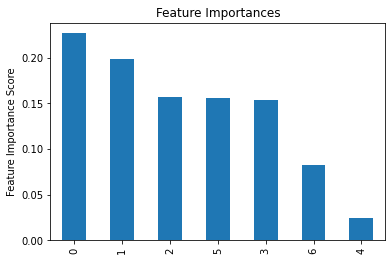

In [0]:
#Choose all predictors except target & IDcols
target = 'target2'
predictors = [x for x in train2.columns if x not in [target]]

#xgb2_ori = XGBClassifier(objective="multi:softmax", num_class=3, seed=1)
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 4869)
rf.fit(X_2, y_2)

rf_pred = rf.predict(X_2)
#rf.predict_proba(X_2)
#print(classification_report(y_2, rf_pred))
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(y_2, rf_pred))
print(classification_report(y_2, rf_pred))
                
feat_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.6558
              precision    recall  f1-score   support

         0.0       0.56      0.15      0.23      1007
         1.0       0.66      0.88      0.75      3786
         2.0       0.66      0.49      0.57      1988

    accuracy                           0.66      6781
   macro avg       0.63      0.51      0.52      6781
weighted avg       0.65      0.66      0.62      6781



Text(0, 0.5, 'Feature Importance Score')

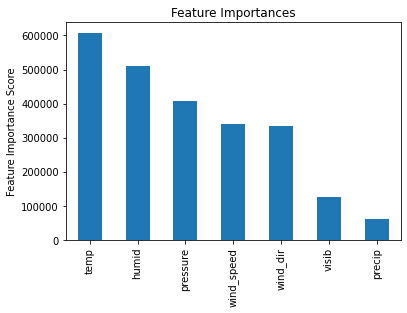

In [0]:
# XGBoost
target = 'target2'
predictors = [x for x in train2.columns if x not in [target]]

params = {
  'learning_rate': 1,
  'max_depth': 9,
  'num_parallel_tree': 100,
  'objective': 'multii:softmax',
  'num_class': 3,
  'tree_method': 'gpu_hist'
}
#xgb2_ori = XGBClassifier(objective="multi:softmax", num_class=3, seed=1)
xgb2_tuned = XGBClassifier(**params)
xgb2_tuned.fit(train2[predictors], train2[target])

xgb2_tuned_pred = xgb2_tuned.predict(train2[predictors])
#rf.predict_proba(X_2)
#print(classification_report(y_2, rf_pred))
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(train2[target], xgb2_tuned_pred))
print(classification_report(train2[target], xgb2_tuned_pred))
                
feat_imp = pd.Series(xgb2_tuned.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.6558
              precision    recall  f1-score   support

         0.0       0.56      0.15      0.23      1007
         1.0       0.66      0.88      0.75      3786
         2.0       0.66      0.49      0.57      1988

    accuracy                           0.66      6781
   macro avg       0.63      0.51      0.52      6781
weighted avg       0.65      0.66      0.62      6781



Text(0, 0.5, 'Feature Importance Score')

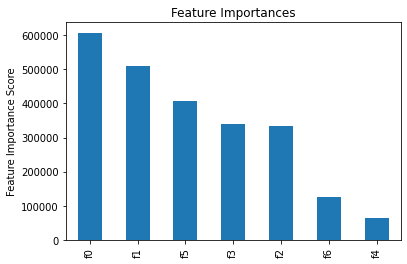

In [0]:
# XGBoost
target = 'target2'
predictors = [x for x in train2.columns if x not in [target]]

params = {
  'learning_rate': 1,
  'max_depth': 9,
  'num_parallel_tree': 100,
  'objective': 'multii:softmax',
  'num_class': 3,
  'tree_method': 'gpu_hist'
}
#xgb2_ori = XGBClassifier(objective="multi:softmax", num_class=3, seed=1)
xgb2_tuned = XGBClassifier(**params)
xgb2_tuned.fit(X_2, y_2)

xgb2_tuned_pred = xgb2_tuned.predict(X_2)
#rf.predict_proba(X_2)
#print(classification_report(y_2, rf_pred))
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.accuracy_score(y_2, xgb2_tuned_pred))
print(classification_report(y_2, xgb2_tuned_pred))
                
feat_imp = pd.Series(xgb2_tuned.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

#### Validation

In [0]:
X_2_test = X_test[xgb_pred_test[:] == 1, :]
y_2_test = y_t_test[xgb_pred_test[:] == 1]

In [0]:
pred_2_test = xgb2_tuned.predict(X_2_test)

In [0]:
collections.Counter(y_2_test)

Counter({0.0: 3506, 1.0: 629, 2.0: 377})

In [0]:
collections.Counter(pred_2_test)

Counter({0.0: 434, 1.0: 3400, 2.0: 678})

In [0]:
# XGBoost
print(classification_report(y_2_test, pred_2_test))

              precision    recall  f1-score   support

         0.0       0.95      0.12      0.21      3506
         1.0       0.15      0.80      0.25       629
         2.0       0.26      0.47      0.34       377

    accuracy                           0.24      4512
   macro avg       0.45      0.46      0.26      4512
weighted avg       0.78      0.24      0.23      4512



In [0]:
# Random Forest
pred_2_test_rf = rf.predict(X_2_test)
print(classification_report(y_2_test, pred_2_test_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.12      0.21      3506
         1.0       0.15      0.79      0.25       629
         2.0       0.23      0.48      0.31       377

    accuracy                           0.24      4512
   macro avg       0.44      0.46      0.26      4512
weighted avg       0.77      0.24      0.23      4512



### Holistic testing/ prediction (XGBoost)

In [0]:
X_test.shape

(40370, 7)

In [0]:
layer1_X = X_test[xgb_pred_test[:] == 0, :]
layer1_y = y_t_test[xgb_pred_test[:] == 0]

In [0]:
layer1_y = layer1_y.astype(np.int).tolist()

In [0]:
collections.Counter(xgb_pred_test)

Counter({0: 35858, 1: 4512})

In [0]:
dic = {}
dic['True_y'] = layer1_y

In [0]:
testing1 = pd.DataFrame(dic)

In [0]:
testing1['Pred_y'] = np.zeros((len(testing1['True_y']), 1)).astype(np.int)

In [0]:
testing1

,True_y,Pred_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
35853,0,0
35854,0,0
35855,0,0
35856,0,0


In [0]:
testing2 = pd.DataFrame(y_2_test, columns=["True_y"])

In [0]:
testing2['Pred_y'] = pred_2_test

In [0]:
testing2

,True_y,Pred_y
0,1.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,1.0
...,...,...
4507,1.0,1.0
4508,0.0,1.0
4509,0.0,1.0
4510,0.0,1.0


In [0]:
testing = testing1.append(testing2)

In [0]:
print(classification_report(testing["True_y"], testing["Pred_y"]))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     39110
         1.0       0.15      0.62      0.24       811
         2.0       0.26      0.39      0.31       449

    accuracy                           0.91     40370
   macro avg       0.47      0.64      0.50     40370
weighted avg       0.97      0.91      0.93     40370



In [0]:
collections.Counter(y_t_test)

Counter({0.0: 39110, 1.0: 811, 2.0: 449})

In [0]:
collections.Counter(testing['Pred_y'])

Counter({0.0: 36292, 1.0: 3400, 2.0: 678})

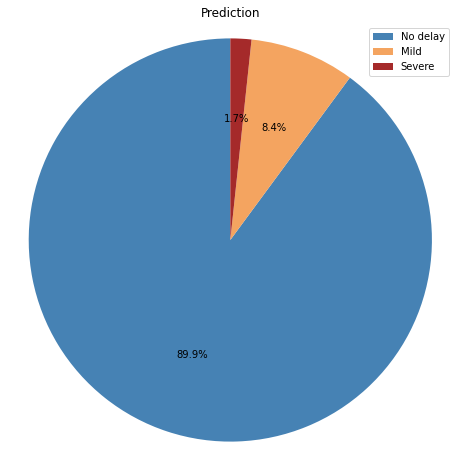

In [0]:
labels = 'No delay', 'Mild','Severe'
sizes = [collections.Counter(testing['Pred_y'])[0], collections.Counter(testing['Pred_y'])[1], collections.Counter(testing['Pred_y'])[2]]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=90, colors=['steelblue', 'sandybrown', 'brown'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Prediction')
ax1.legend(labels = labels)

plt.show()

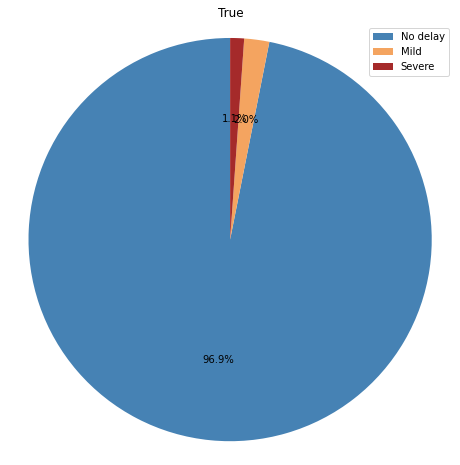

In [0]:
Alabels = 'No delay', 'Mild','Severe'
sizes = [collections.Counter(testing['True_y'])[0], collections.Counter(testing['True_y'])[1], collections.Counter(testing['True_y'])[2]]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['steelblue', 'sandybrown', 'brown'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('True')
ax1.legend(labels = labels)

plt.show()

### Holistic testing/ prediction (RF)

In [0]:
testing1

,True_y,Pred_y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
35853,0,0
35854,0,0
35855,0,0
35856,0,0


In [0]:
testing2_rf = pd.DataFrame(y_2_test, columns=["True_y"])

In [0]:
testing2_rf['Pred_y'] = pred_2_test_rf

In [0]:
testing2_rf

,True_y,Pred_y
0,1.0,0.0
1,1.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,1.0
...,...,...
4507,1.0,1.0
4508,0.0,1.0
4509,0.0,1.0
4510,0.0,1.0


In [0]:
testing_rf = testing1.append(testing2_rf)

In [0]:
print(classification_report(testing_rf["True_y"], testing_rf["Pred_y"]))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     39110
         1.0       0.15      0.61      0.24       811
         2.0       0.23      0.40      0.30       449

    accuracy                           0.91     40370
   macro avg       0.46      0.64      0.50     40370
weighted avg       0.97      0.91      0.93     40370



In [0]:
collections.Counter(y_t_test)

Counter({0.0: 39110, 1.0: 811, 2.0: 449})

In [0]:
collections.Counter(testing['Pred_y'])

Counter({0.0: 36266, 1.0: 3414, 2.0: 690})

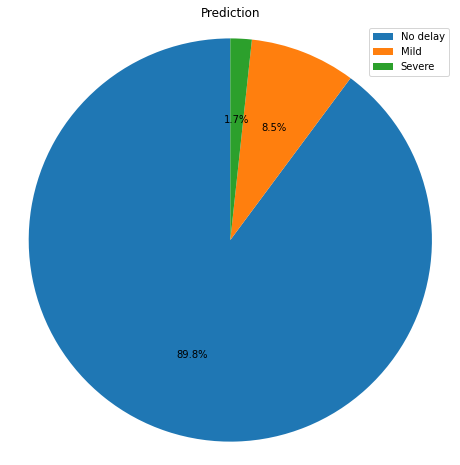

In [0]:
labels = 'No delay', 'Mild','Severe'
sizes = [collections.Counter(testing['Pred_y'])[0], collections.Counter(testing['Pred_y'])[1], collections.Counter(testing['Pred_y'])[2]]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Prediction')
ax1.legend(labels = labels)

plt.show()

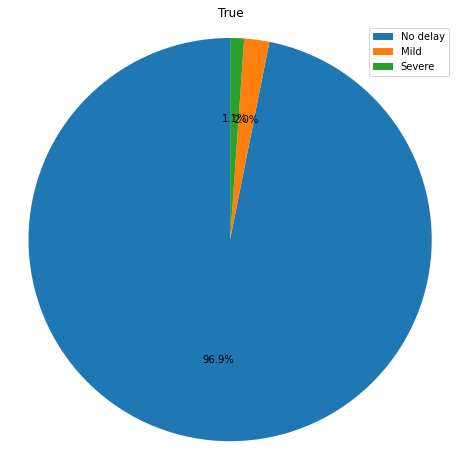

In [0]:
Alabels = 'No delay', 'Mild','Severe'
sizes = [collections.Counter(testing['True_y'])[0], collections.Counter(testing['True_y'])[1], collections.Counter(testing['True_y'])[2]]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('True')
ax1.legend(labels = labels)

plt.show()